In [3]:
import numpy as np
import pandas as pd

from pycaret.classification import *

# Load Training Processed Data

In [24]:
data = pd.read_csv("../data/train_processed_data.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)
data.head(1)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,AllServicesActivated,TeleServicesActivated,Connected,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1.0,1.0,1.0,1.57269,1.0,1.0,2.0,2.0,2.0,2.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0


# Setup PyCaret

In [104]:
# Setup PyCaret AutoML
clf = setup(data=data,target="Churn",preprocess=False,train_size=0.9)

,Description,Value
0,Session id,3426
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(5714, 34)"
4,Transformed data shape,"(5714, 34)"
5,Transformed train set shape,"(5142, 34)"
6,Transformed test set shape,"(572, 34)"
7,Numeric features,33


# Shortlist Best Models

In [105]:
# Compare and return top 3 models
top_5_models = compare_models(sort='F1', n_select=5, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7410,0.8292,0.7817,0.5101,0.6173,0.4343,0.4570,0.0380
lr,Logistic Regression,0.8090,0.8535,0.5553,0.6726,0.6083,0.4836,0.4875,0.0860
lda,Linear Discriminant Analysis,0.8067,0.8497,0.5524,0.6667,0.6041,0.4778,0.4815,0.0760
gbc,Gradient Boosting Classifier,0.8067,0.8513,0.5495,0.6679,0.6028,0.4767,0.4807,1.1680
ada,Ada Boost Classifier,0.8020,0.8463,0.5437,0.6568,0.5947,0.4653,0.4691,0.3280
catboost,CatBoost Classifier,0.8034,0.8473,0.5357,0.6634,0.5926,0.4650,0.4697,5.1940
lightgbm,Light Gradient Boosting Machine,0.7968,0.8396,0.5466,0.6400,0.5893,0.4555,0.4582,0.3780
ridge,Ridge Classifier,0.8051,0.8499,0.5131,0.6788,0.5843,0.4603,0.4680,0.0300
rf,Random Forest Classifier,0.7923,0.8340,0.5044,0.6420,0.5646,0.4309,0.4364,0.6900
xgboost,Extreme Gradient Boosting,0.7793,0.8259,0.5218,0.5998,0.5580,0.4119,0.4137,0.2060


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [106]:
top_5_models

[GaussianNB(priors=None, var_smoothing=1e-09),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=3426, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_e

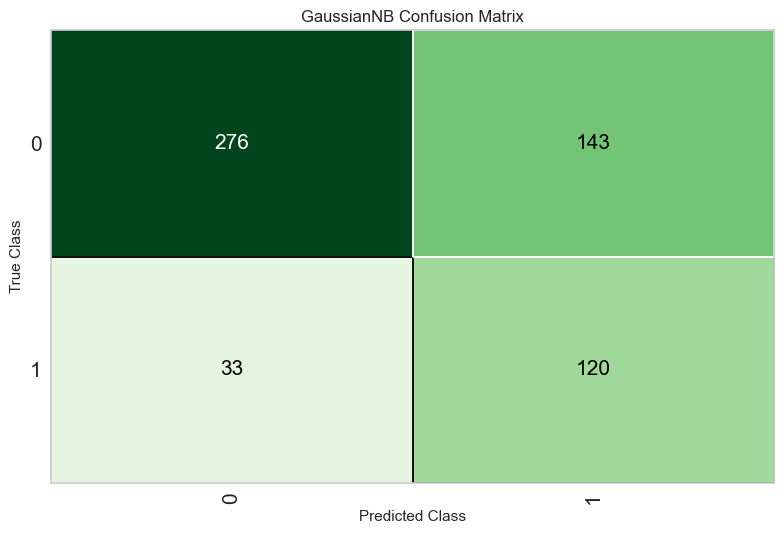

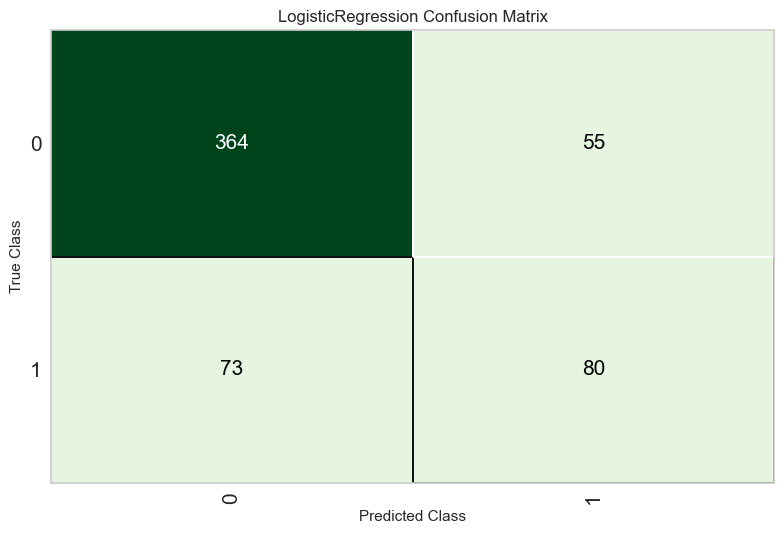

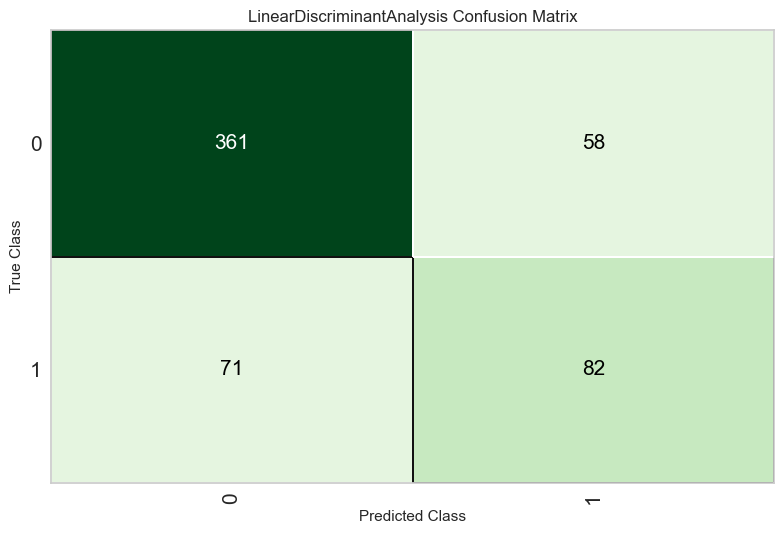

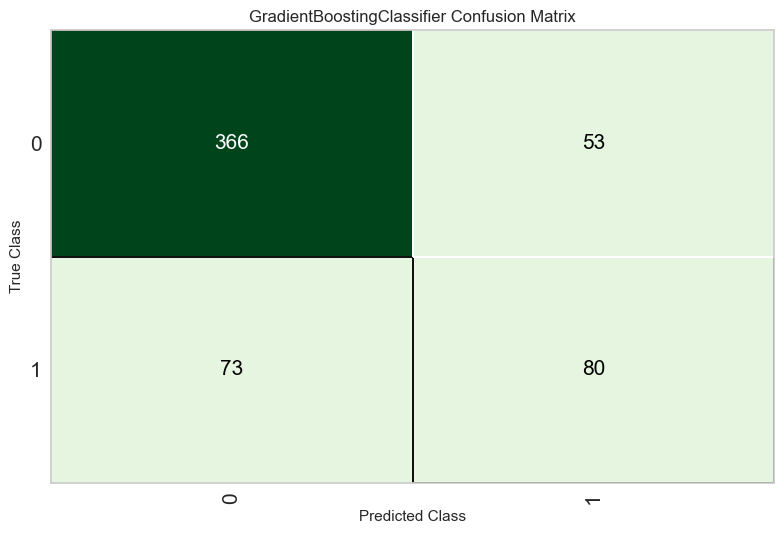

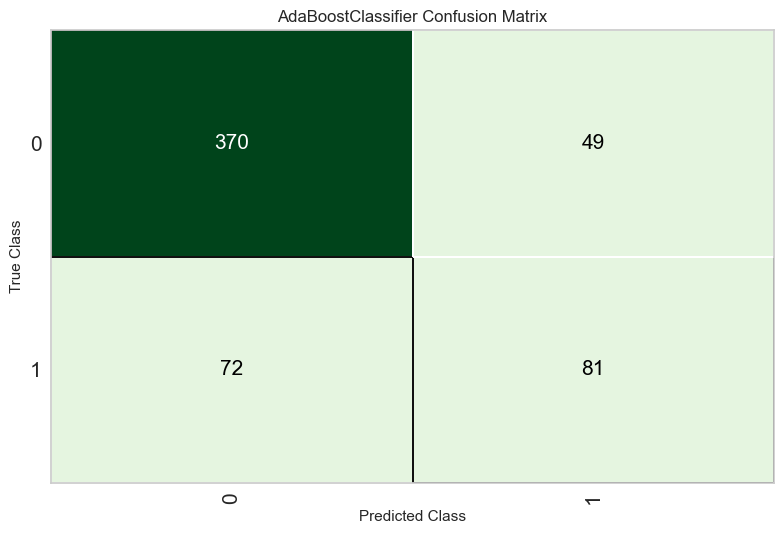

In [107]:
for model in top_5_models:
    plot_model(model, plot='confusion_matrix')

# Store Best Models

In [108]:
from joblib import dump

In [109]:
for model in top_5_models:
    dump(model,f"../models/{model.__class__.__name__}.joblib")